In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Scikit-Learn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:

appli = pd.read_csv('application_record.csv')
cr = pd.read_csv('credit_record.csv')

In [3]:
appli.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [4]:
appli.shape

(438557, 18)

In [5]:
appli.keys()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [6]:
appli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
appli.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [8]:

appli.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [9]:
appli.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [10]:
appli= appli.drop_duplicates(subset='ID').reset_index(drop=True)

In [11]:
cr.head(10)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [12]:
cr.shape

(1048575, 3)

In [13]:
# prompt: all the columns un cr

cr.keys()

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [14]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [15]:
cr.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

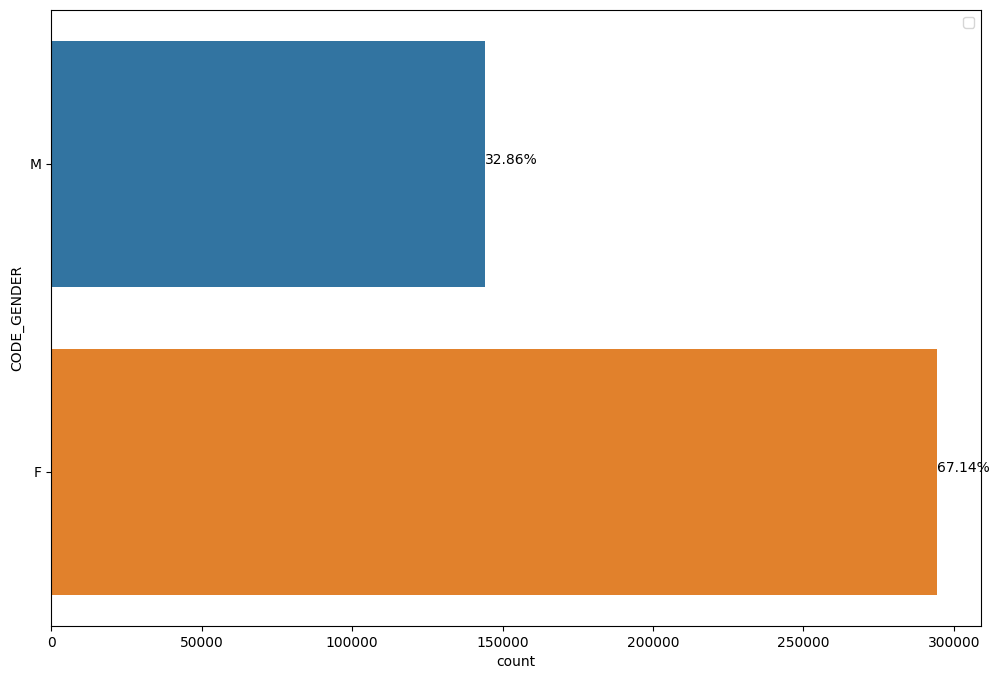

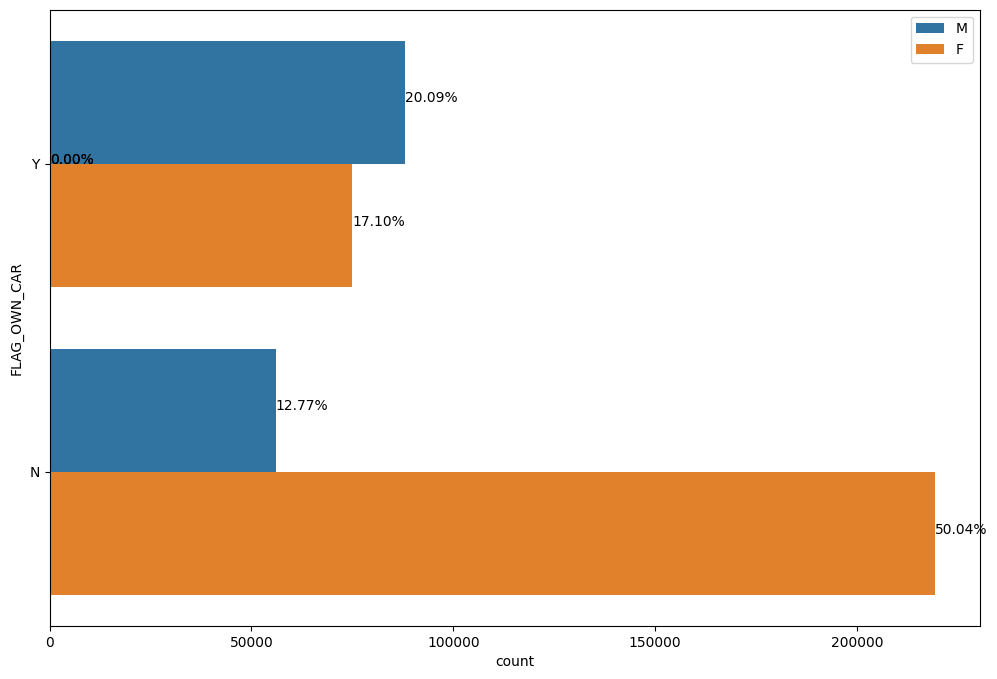

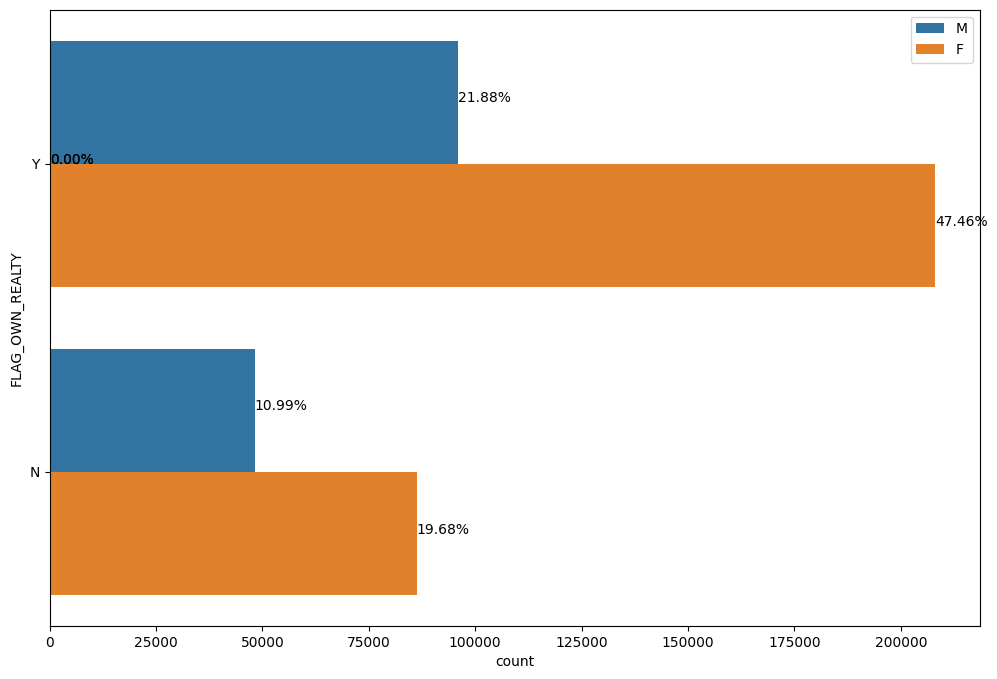

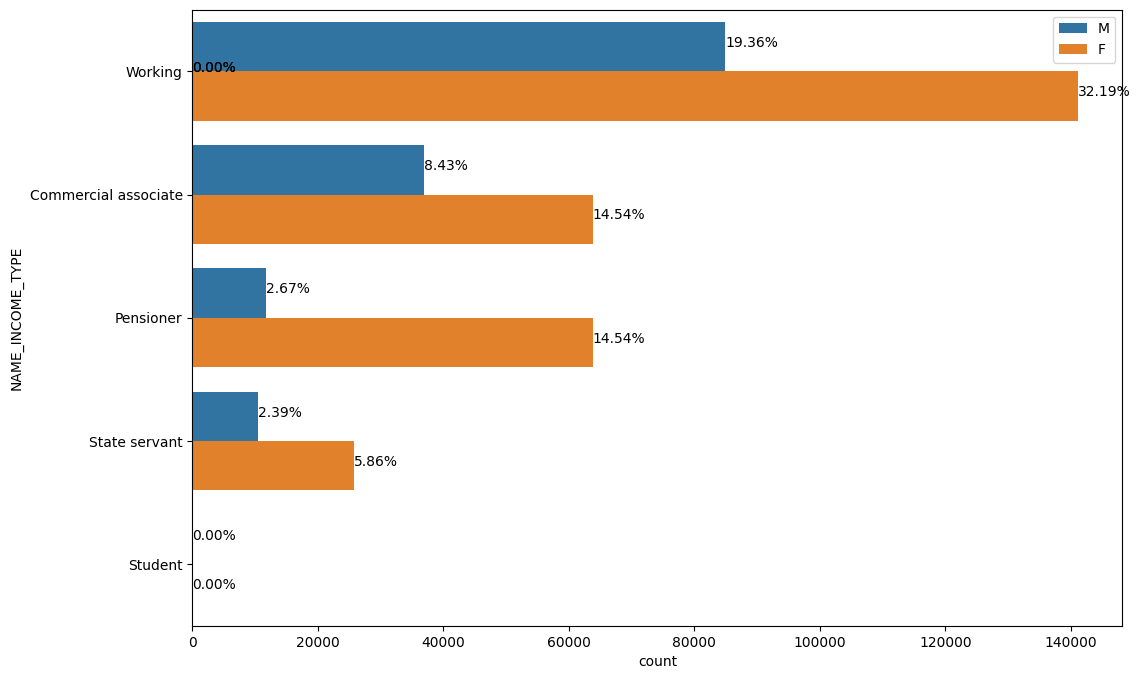

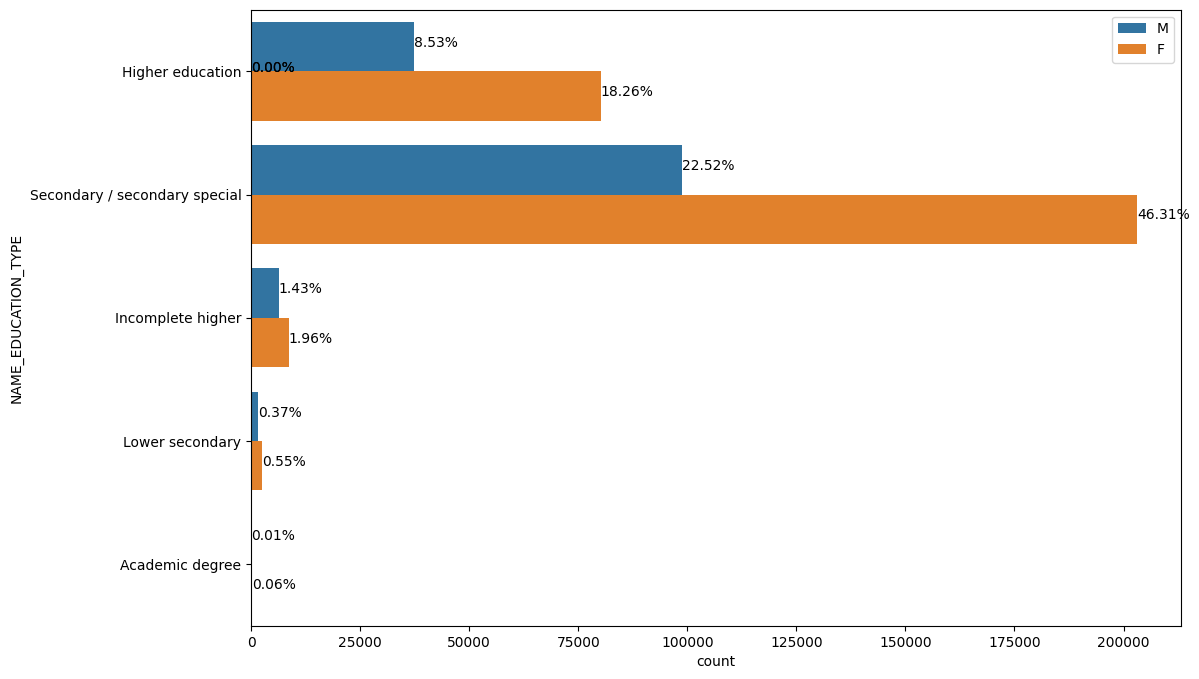

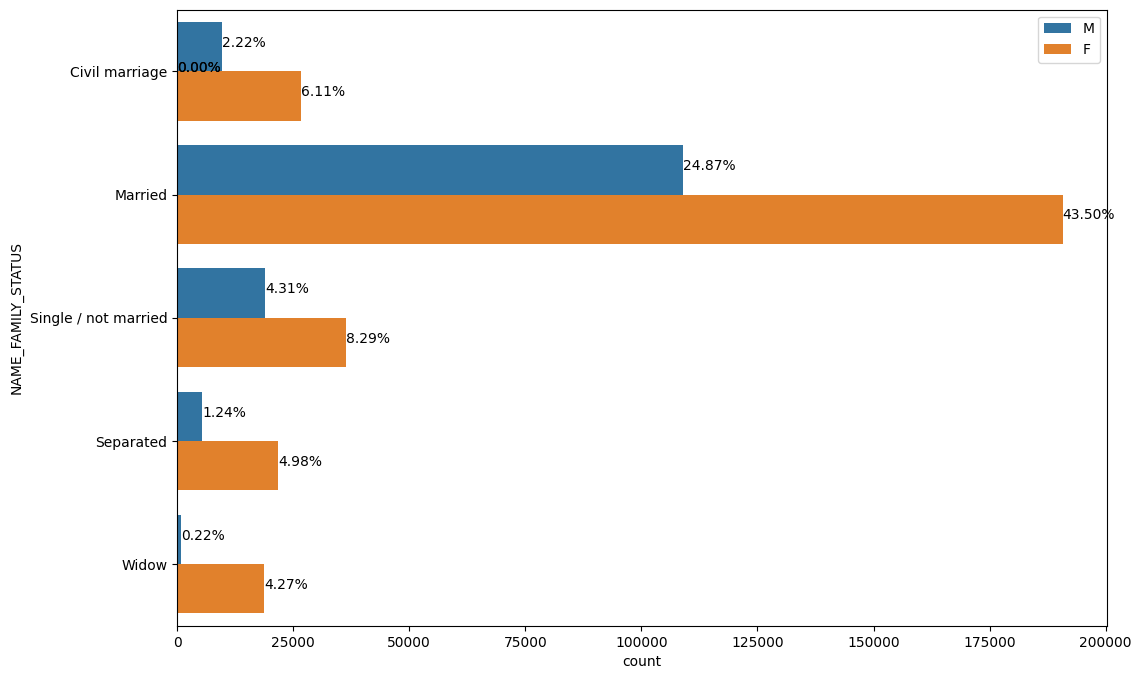

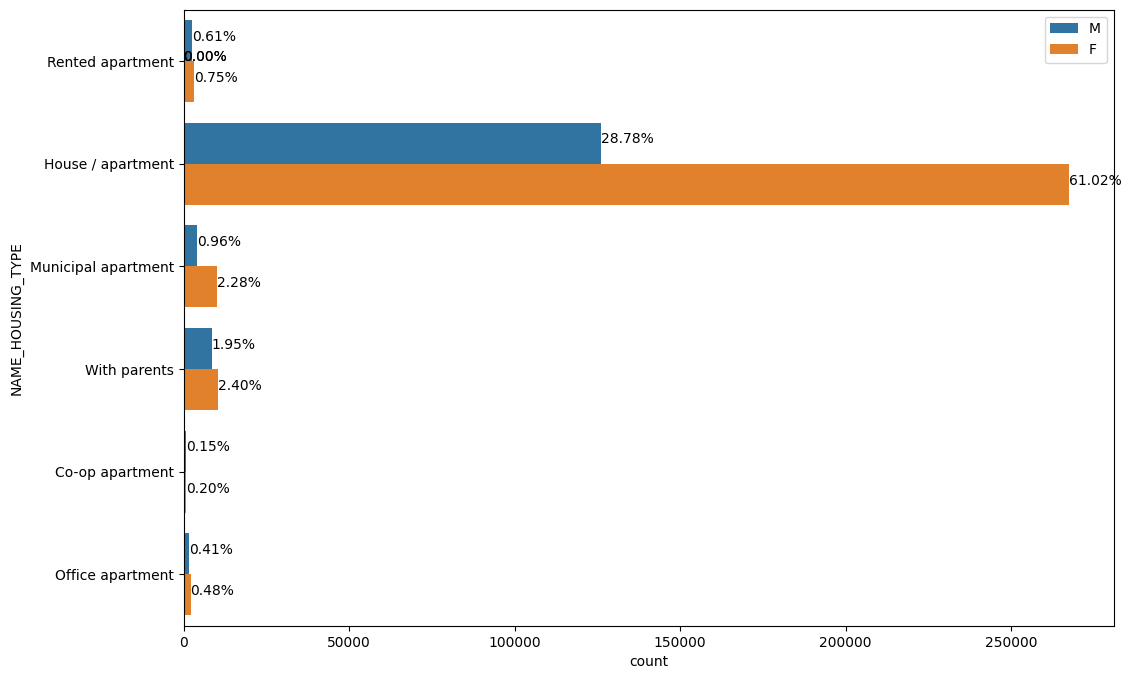

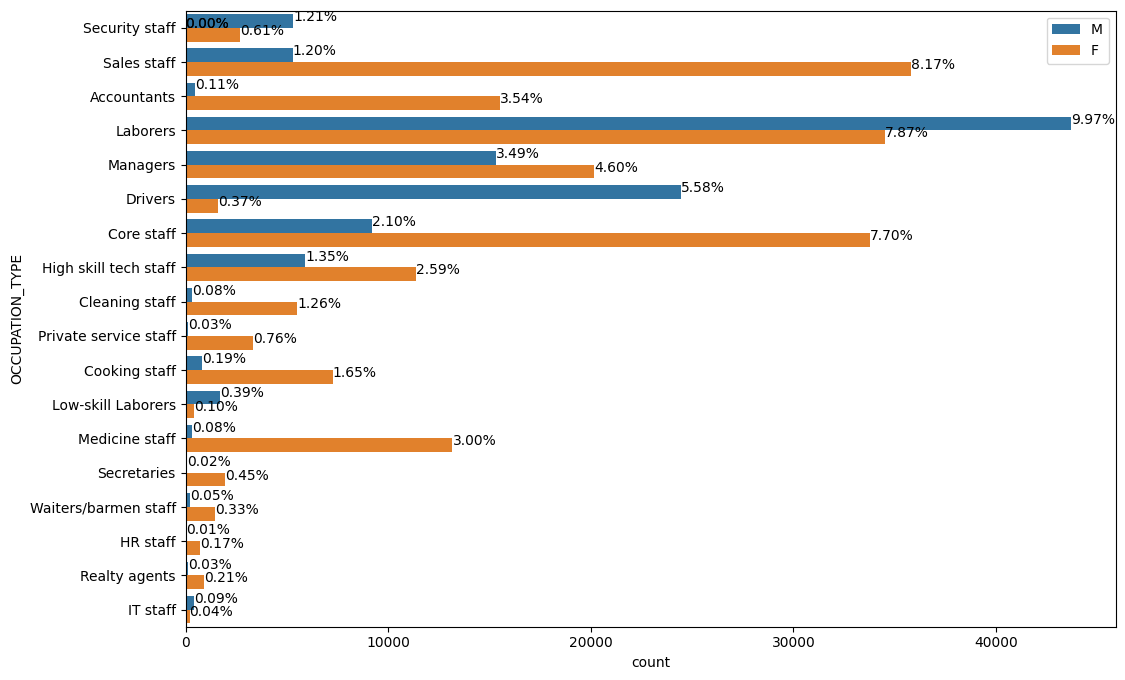

In [16]:
def countplot_appli(app_features, app_hue):
    for app_feature in app_features:
        
        plt.figure(figsize = (12, 8))
        ax = sns.countplot(y = appli[app_feature], hue = app_hue , data = appli)
        plt.legend(loc = 'best')
        n = len(appli[app_feature])
        
        for bar in ax.patches:
            percentage = '{:.2f}%'.format(100 * bar.get_width()/n)
            x = bar.get_x() + bar.get_width() + 0.05
            y = bar.get_y() + bar.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()
    
app_features = []
for column in appli.columns:
    if (appli[column].dtype == 'object'):
        app_features.append(column)

countplot_appli(app_features, 'CODE_GENDER')
plt.show()

In [17]:
age=[]

for i in range(0,len(appli)):
  res=(abs(appli['DAYS_BIRTH'][i]//365.25))
  age.append(res)




In [18]:
appli.insert(11,'AGE',age)
appli.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [19]:
appli.loc[(appli["DAYS_EMPLOYED"]>0),"DAYS_EMPLOYED"]=0

In [20]:
employed_years=[]

for j in range(0,len(appli)):
    resu=abs(appli['DAYS_EMPLOYED'][j]//365.25)
    employed_years.append(resu)

In [21]:
appli.insert(13,'EMPLOYED_YEARS',employed_years)


In [22]:
appli.drop(['DAYS_EMPLOYED'],axis=1,inplace=True)

In [23]:
appli.drop_duplicates(subset=['ID'],inplace=True)

In [24]:
appli.drop(["FLAG_MOBIL"], axis=1 , inplace=True)

In [25]:
appli['OCCUPATION_TYPE'].fillna(value="Occupation not identified ",inplace=True)

In [26]:
appli.loc[(appli['NAME_INCOME_TYPE'] == 'Pensioner') & (appli['OCCUPATION_TYPE'] == 'Occupation Not Identified'), 'OCCUPATION_TYPE'] = 'Retired'

In [27]:
appli

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,EMPLOYED_YEARS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,13.0,1,0,0,Occupation not identified,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,13.0,1,0,0,Occupation not identified,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,4.0,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,53.0,9.0,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,53.0,9.0,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,63.0,0.0,0,0,0,Occupation not identified,1.0
438506,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44.0,9.0,0,0,0,Laborers,1.0
438507,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,23.0,2.0,1,0,0,Sales staff,1.0
438508,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,60.0,0.0,0,0,0,Occupation not identified,2.0


In [28]:
cr[['ID',"MONTHS_BALANCE"]].drop_duplicates()

,ID,MONTHS_BALANCE
0,5001711,0
1,5001711,-1
2,5001711,-2
3,5001711,-3
4,5001712,0
...,...,...
1048570,5150487,-25
1048571,5150487,-26
1048572,5150487,-27
1048573,5150487,-28


In [29]:

convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
cr.replace({'STATUS' : convert_to}, inplace = True) 

cr

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [30]:
cr=cr.value_counts(subset =['ID',"STATUS"]).unstack(fill_value=0)
cr

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


In [31]:

cr.loc[(cr['Good_Debt'] >cr['Neutral_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
cr.loc[(cr['Good_Debt'] >cr['Bad_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
cr.loc[(cr['Neutral_Debt'] > cr['Bad_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
cr.loc[(cr['Neutral_Debt'] > cr['Good_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0
cr.loc[(cr['Bad_Debt'] > cr['Good_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0
cr.loc[(cr['Bad_Debt'] > cr['Neutral_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0


In [32]:
cr['CREDIT_CARD_APPROVAL_STATUS']=cr['CREDIT_CARD_APPROVAL_STATUS'].astype(int)
cr

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_CARD_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


In [33]:
cr.drop(['Bad_Debt','Good_Debt','Neutral_Debt'],axis=1,inplace=True)
cr

STATUS,CREDIT_CARD_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


In [34]:
cr['CREDIT_CARD_APPROVAL_STATUS'].value_counts()

CREDIT_CARD_APPROVAL_STATUS
1    45726
0      259
Name: count, dtype: int64

In [35]:
encoded = pd.get_dummies(appli[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']], prefix=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], drop_first = True).astype(int)
encoded

,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation not identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
438506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438507,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
438508,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
appli=appli.join(encoded)

In [37]:
appli.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], axis = 1, inplace = True)

In [38]:

merged_df = appli.reset_index().merge(cr, on = 'ID').set_index('index')
merged_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,EMPLOYED_YEARS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation not identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CREDIT_CARD_APPROVAL_STATUS
index,,,,,,,,,,,,,,,,,,,,,
0,5008804,0,427500.0,33.0,13.0,1,0,0,2.0,1,...,0,0,1,0,0,0,0,0,0,1
1,5008805,0,427500.0,33.0,13.0,1,0,0,2.0,1,...,0,0,1,0,0,0,0,0,0,1
2,5008806,0,112500.0,59.0,4.0,0,0,0,2.0,1,...,0,0,0,0,0,0,0,1,0,1
3,5008808,0,270000.0,53.0,9.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
4,5008809,0,270000.0,53.0,9.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434761,5149828,0,315000.0,48.0,7.0,0,0,0,2.0,1,...,1,0,0,0,0,0,0,0,0,0
434762,5149834,0,157500.0,34.0,4.0,0,1,1,2.0,0,...,0,1,0,0,0,0,0,0,0,0
434763,5149838,0,157500.0,34.0,4.0,0,1,1,2.0,0,...,0,1,0,0,0,0,0,0,0,1


In [39]:
merged_df.to_csv('cleaned_dataset.csv')

In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36457 entries, 0 to 434765
Data columns (total 48 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   CNT_CHILDREN                                       36457 non-null  int64  
 2   AMT_INCOME_TOTAL                                   36457 non-null  float64
 3   AGE                                                36457 non-null  float64
 4   EMPLOYED_YEARS                                     36457 non-null  float64
 5   FLAG_WORK_PHONE                                    36457 non-null  int64  
 6   FLAG_PHONE                                         36457 non-null  int64  
 7   FLAG_EMAIL                                         36457 non-null  int64  
 8   CNT_FAM_MEMBERS                                    36457 non-null  float64
 9   CODE_GENDE

In [41]:
merged_df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
AGE,36457.0,4.423137e+01,11.504127,21.0,35.0,43.0,54.0,69.0
EMPLOYED_YEARS,36457.0,6.444496e+00,6.570677,0.0,2.0,5.0,9.0,44.0
FLAG_WORK_PHONE,36457.0,2.255260e-01,0.417934,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,36457.0,2.948131e-01,0.455965,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,36457.0,8.972214e-02,0.285787,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,36457.0,2.198453e+00,0.911686,1.0,2.0,2.0,3.0,20.0
CODE_GENDER_M,36457.0,3.298955e-01,0.470181,0.0,0.0,0.0,1.0,1.0


In [42]:

merged_df.nunique()

ID                                                   36457
CNT_CHILDREN                                             9
AMT_INCOME_TOTAL                                       265
AGE                                                     49
EMPLOYED_YEARS                                          45
FLAG_WORK_PHONE                                          2
FLAG_PHONE                                               2
FLAG_EMAIL                                               2
CNT_FAM_MEMBERS                                         10
CODE_GENDER_M                                            2
FLAG_OWN_CAR_Y                                           2
FLAG_OWN_REALTY_Y                                        2
NAME_INCOME_TYPE_Pensioner                               2
NAME_INCOME_TYPE_State servant                           2
NAME_INCOME_TYPE_Student                                 2
NAME_INCOME_TYPE_Working                                 2
NAME_EDUCATION_TYPE_Higher education                    

In [43]:
merged_df.isnull().sum()

ID                                                   0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AGE                                                  0
EMPLOYED_YEARS                                       0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCA

In [58]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [45]:

X = merged_df.drop('CREDIT_CARD_APPROVAL_STATUS', axis = 1)
Y = merged_df['CREDIT_CARD_APPROVAL_STATUS']

In [46]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [47]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
y_pred=model.predict(X_test)

In [49]:
accuracy_score(Y_test,y_pred)

0.9897604680928872

In [50]:
f1_score(Y_test, y_pred)

0.9948467838409865

In [51]:
 roc_auc_score(Y_test, y_pred)

np.float64(0.598912102455917)

In [52]:
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)

LogisticRegression()

In [53]:
y_pred=model_lr.predict(X_test)

In [54]:
accuracy_score(Y_test,y_pred)

0.9932345949899433

In [63]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:
y_pred_rf= rf_model.predict(X_test);


In [64]:
accuracy_score(Y_test,y_pred_rf)

0.9906747120131651